<a href="https://colab.research.google.com/github/Arunmangalathsebastian/Teleportaion-and-Its-experimental-average-fidelity-/blob/main/Qiskit_code_for_quantum_computing_paper_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install qiskit

# Importing modules

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from qiskit import *
from qiskit import QuantumCircuit
#from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram
from qiskit import QuantumCircuit, transpile
from qiskit.providers.basicaer import QasmSimulatorPy
#from qiskit.providers.aer.extensions.snapshot_statevector import *
import qiskit.quantum_info as qi


from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import BasicAer
from qiskit.compiler import transpile
from qiskit.quantum_info.operators import Operator, Pauli
from qiskit.quantum_info import process_fidelity

from qiskit.extensions import RXGate, XGate, CXGate

# **qiskit test**

In [ ]:
simulator = QasmSimulator() # creating an obeject called simulator

In [ ]:
circuit = QuantumCircuit(2, 2)
circuit.draw()

q_0: 
     
q_1: 
     
c: 2/

In [ ]:
circuit.h(0)
circuit.cx(0,1) # creating bell state
statevector = qi.Statevector.from_instruction(circuit)
print(statevector)
statevector.draw('latex')

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


<IPython.core.display.Latex object>

In [ ]:
 circuit.measure([0,1], [0,1])
 circuit.draw()

┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

In [ ]:
compiled_circuit = transpile(circuit, simulator)
simulation = simulator.run(compiled_circuit, shots=1000)
result = simulation.result()
counts = result.get_counts(compiled_circuit)
print(counts)

{'11': 484, '00': 516}


In [ ]:
print("Total count for 00 and 11 are:",counts)

Total count for 00 and 11 are: {'11': 484, '00': 516}


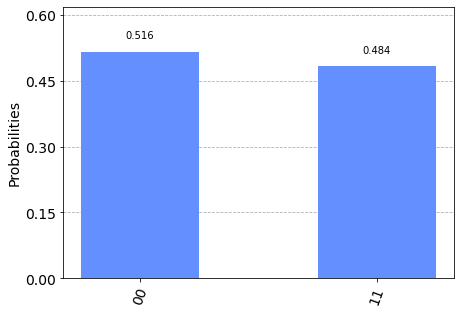

In [ ]:
plot_histogram(counts)

# **Quantum circuit basics**

In [ ]:
import numpy as np
from qiskit import QuantumCircuit

In [ ]:
# Create a Quantum Circuit acting on a quantum register of three qubits
qcircuit = QuantumCircuit(3)
print(qcircuit)
statevector1 = qi.Statevector.from_instruction(qcircuit)
statevector1.draw('latex')
qcircuit.x(0)
qcircuit.x(2)
statevector2 = qi.Statevector.from_instruction(qcircuit)
statevector2.draw('latex')
qcircuit.h(0)
qcircuit.cx(1,2)
statevector3 = qi.Statevector.from_instruction(qcircuit)
statevector3 = qi.Statevector.from_instruction(qcircuit)
qcircuit.draw()
statevector3.draw('latex')

     
q_0: 
     
q_1: 
     
q_2: 
     


<IPython.core.display.Latex object>

In [ ]:
circuit = QuantumCircuit(4, 4)
circuit.draw()

q_0: 
     
q_1: 
     
q_2: 
     
q_3: 
     
c: 4/

In [ ]:
circuit.h(0)
statevector = qi.Statevector.from_instruction(circuit)

circuit.h(1)
circuit.h(2)
circuit.h(3)
circuit.cz(0,1)
circuit.cz(1,2)
circuit.cz(2,3)
circuit.h(0)
circuit.h(3)
statevector = qi.Statevector.from_instruction(circuit)
circuit.draw()
statevector.draw('latex')
print(statevector)

Statevector([ 5.00000000e-01+0.j,  4.76210391e-18+0.j,  4.76210391e-18+0.j,
              5.00000000e-01+0.j,  1.18079001e-17+0.j,  6.31580767e-35+0.j,
             -6.31580767e-35+0.j, -1.18079001e-17+0.j,  1.18079001e-17+0.j,
              6.31580767e-35+0.j,  6.31580767e-35+0.j,  1.18079001e-17+0.j,
              5.00000000e-01+0.j,  4.76210391e-18+0.j, -4.76210391e-18+0.j,
             -5.00000000e-01+0.j],
            dims=(2, 2, 2, 2))


In [ ]:
circuit.draw()

┌───┐   ┌───┐        
q_0: ┤ H ├─■─┤ H ├────────
     ├───┤ │ └───┘        
q_1: ┤ H ├─■───■──────────
     ├───┤     │          
q_2: ┤ H ├─────■───■──────
     ├───┤         │ ┌───┐
q_3: ┤ H ├─────────■─┤ H ├
     └───┘           └───┘
c: 4/═════════════════════

# **Super dense coding of 2 bit**

In [ ]:
from qiskit import QuantumCircuit
from qiskit import IBMQ, Aer, transpile, assemble
from qiskit.visualization import plot_histogram


circuit = QuantumCircuit(2)
circuit.draw()

q_0: 
     
q_1:

In [ ]:
circuit.h(0)
circuit.cx(0,1)
circuit.draw()

┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘

In [ ]:
#encoding
circuit.z(0)
circuit.x(0) # 10
circuit.draw()

┌───┐     ┌───┐┌───┐
q_0: ┤ H ├──■──┤ Z ├┤ X ├
     └───┘┌─┴─┐└───┘└───┘
q_1: ─────┤ X ├──────────
          └───┘

In [ ]:
#decoding
circuit.cx(0,1)
circuit.h(0)
circuit.draw()

┌───┐     ┌───┐┌───┐     ┌───┐
q_0: ┤ H ├──■──┤ Z ├┤ X ├──■──┤ H ├
     └───┘┌─┴─┐└───┘└───┘┌─┴─┐└───┘
q_1: ─────┤ X ├──────────┤ X ├─────
          └───┘          └───┘

In [ ]:
circuit.measure_all()

{'11': 1024}


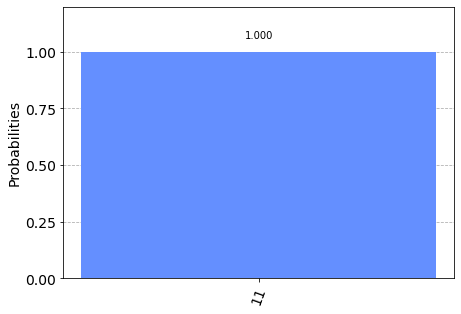

In [ ]:
aer_sim = Aer.get_backend('aer_simulator')
qobj = assemble(circuit)
result = aer_sim.run(qobj).result()
counts = result.get_counts(circuit)
print(counts)
plot_histogram(counts)

In [ ]:
def create_bell_pair():
    """
    Returns:
        QuantumCircuit: Circuit that produces a Bell pair
    """
    qc = QuantumCircuit(2)
    qc.h(1)
    qc.cx(1, 0)
    return qc


In [ ]:
def encode_message(qc, qubit, msg):
    """Encodes a two-bit message on qc using the superdense coding protocol
    Args:
        qc (QuantumCircuit): Circuit to encode message on
        qubit (int): Which qubit to add the gate to
        msg (str): Two-bit message to send
    Returns:
        QuantumCircuit: Circuit that, when decoded, will produce msg
    Raises:
        ValueError if msg is wrong length or contains invalid characters
    """
    if len(msg) != 2 or not set(msg).issubset({"0","1"}):
        raise ValueError(f"message '{msg}' is invalid")
    if msg[1] == "1":
        qc.x(qubit)
    if msg[0] == "1":
        qc.z(qubit)
    return qc

In [ ]:
def decode_message(qc):
    qc.cx(1, 0)
    qc.h(1)
    return qc

In [ ]:
# Charlie creates the entangled pair between Alice and Bob
qc = create_bell_pair()

# We'll add a barrier for visual separation
qc.barrier()

# At this point, qubit 0 goes to Alice and qubit 1 goes to Bob

# Next, Alice encodes her message onto qubit 1. In this case,
# we want to send the message '10'. You can try changing this
# value and see how it affects the circuit
message = '10'
qc = encode_message(qc, 0, message)
qc.barrier()
# Alice then sends her qubit to Bob.
statevector1 = qi.Statevector.from_instruction(qc)

# After recieving qubit 0, Bob applies the recovery protocol:
qc = decode_message(qc)
statevector2 = qi.Statevector.from_instruction(qc)

# Finally, Bob measures his qubits to read Alice's message
qc.measure_all()

# Draw our output
qc.draw()

┌───┐ ░ ┌───┐ ░ ┌───┐      ░ ┌─┐   
   q_0: ─────┤ X ├─░─┤ Z ├─░─┤ X ├──────░─┤M├───
        ┌───┐└─┬─┘ ░ └───┘ ░ └─┬─┘┌───┐ ░ └╥┘┌─┐
   q_1: ┤ H ├──■───░───────░───■──┤ H ├─░──╫─┤M├
        └───┘      ░       ░      └───┘ ░  ║ └╥┘
meas: 2/═══════════════════════════════════╩══╩═
                                           0  1

In [ ]:
statevector1.draw('latex')

<IPython.core.display.Latex object>

In [ ]:
statevector2.draw('latex')

<IPython.core.display.Latex object>

{'10': 1024}


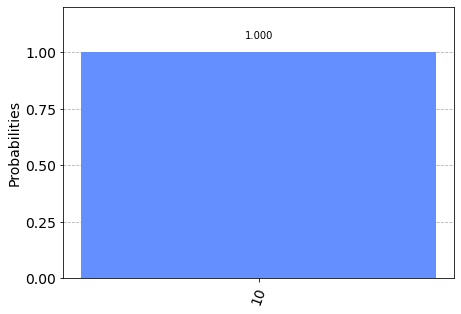

In [ ]:
aer_sim = Aer.get_backend('aer_simulator')
qobj = assemble(qc)
result = aer_sim.run(qobj).result()
counts = result.get_counts(qc)
print(counts)
plot_histogram(counts)

# Super dense coding of 3 bit


In [ ]:
circuit = QuantumCircuit(3)
circuit.draw()

q_0: 
     
q_1: 
     
q_2:

In [ ]:
circuit.h(0)
circuit.cx(0,1)
circuit.cx(1,2)
print(circuit.draw())
statevector1 = qi.Statevector.from_instruction(circuit)
statevector1.draw('latex')

     ┌───┐          
q_0: ┤ H ├──■───────
     └───┘┌─┴─┐     
q_1: ─────┤ X ├──■──
          └───┘┌─┴─┐
q_2: ──────────┤ X ├
               └───┘


<IPython.core.display.Latex object>

In [ ]:
#encoding
from qiskit.quantum_info.operators import Operator, Pauli

circuit.y(0)
circuit.z(1)
circuit.draw()

┌───┐     ┌───┐     
q_0: ┤ H ├──■──┤ Y ├─────
     └───┘┌─┴─┐└───┘┌───┐
q_1: ─────┤ X ├──■──┤ Z ├
          └───┘┌─┴─┐└───┘
q_2: ──────────┤ X ├─────
               └───┘

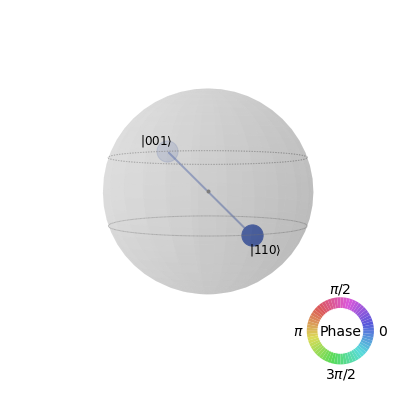

In [ ]:
statevector2 = qi.Statevector.from_instruction(circuit)
statevector2.draw('qsphere')

In [ ]:
#decoding
circuit.cx(1,2)
circuit.cx(0,1)
circuit.h(0)
print(circuit.draw())

     ┌───┐     ┌───┐               ┌───┐
q_0: ┤ H ├──■──┤ Y ├────────────■──┤ H ├
     └───┘┌─┴─┐└───┘┌───┐     ┌─┴─┐└───┘
q_1: ─────┤ X ├──■──┤ Z ├──■──┤ X ├─────
          └───┘┌─┴─┐└───┘┌─┴─┐└───┘     
q_2: ──────────┤ X ├─────┤ X ├──────────
               └───┘     └───┘          


In [ ]:
circuit.measure_all()

{'010': 1024}


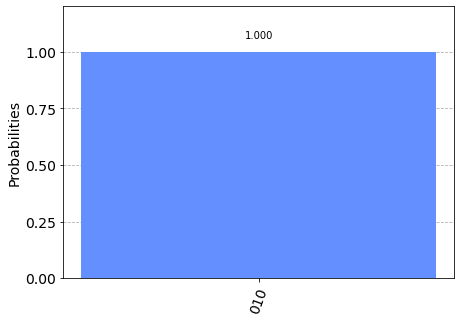

In [ ]:
aer_sim = Aer.get_backend('aer_simulator')
qobj = assemble(circuit)
result = aer_sim.run(qobj).result()
counts = result.get_counts(circuit)
print(counts)
plot_histogram(counts)

# Arbirary 2 qubit teleportation using cluster state

based on 'Experimental realization of quantum teleportation of an arbitrary two-qubit state using a four-qubit cluster state Rajiuddin Sk1 · Alakesh Baishya2 · Bikash K. Behera1,3 · Prasanta K. Panigrahi1'

In [ ]:
simulator = QasmSimulator()

In [ ]:
circuit = QuantumCircuit(6, 2)
circuit.draw()

q_0: 
     
q_1: 
     
q_2: 
     
q_3: 
     
q_4: 
     
q_5: 
     
c_0: 
     
c_1:

In [ ]:
circuit.h(0)
circuit.cx(0,1) # creating bell state for teleporting
circuit.draw()

┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘
q_2: ──────────
               
q_3: ──────────
               
q_4: ──────────
               
q_5: ──────────
               
c_0: ══════════
               
c_1: ══════════

In [ ]:
circuit.h(2)
circuit.h(3)
circuit.h(4)
circuit.h(5)
circuit.barrier()
circuit.draw()

┌───┐      ░ 
q_0: ┤ H ├──■───░─
     └───┘┌─┴─┐ ░ 
q_1: ─────┤ X ├─░─
     ┌───┐└───┘ ░ 
q_2: ┤ H ├──────░─
     ├───┤      ░ 
q_3: ┤ H ├──────░─
     ├───┤      ░ 
q_4: ┤ H ├──────░─
     ├───┤      ░ 
q_5: ┤ H ├──────░─
     └───┘      ░ 
c_0: ═════════════
                  
c_1: ═════════════

In [ ]:
# creating 4 qubit cluster state
circuit.cz(2,3)
circuit.h(2)
circuit.cz(3,4)
circuit.cz(4,5)
circuit.h(5)
circuit.barrier()
circuit.draw()

┌───┐      ░                  ░ 
q_0: ┤ H ├──■───░──────────────────░─
     └───┘┌─┴─┐ ░                  ░ 
q_1: ─────┤ X ├─░──────────────────░─
     ┌───┐└───┘ ░    ┌───┐         ░ 
q_2: ┤ H ├──────░──■─┤ H ├─────────░─
     ├───┤      ░  │ └───┘         ░ 
q_3: ┤ H ├──────░──■───■───────────░─
     ├───┤      ░      │           ░ 
q_4: ┤ H ├──────░──────■───■───────░─
     ├───┤      ░          │ ┌───┐ ░ 
q_5: ┤ H ├──────░──────────■─┤ H ├─░─
     └───┘      ░            └───┘ ░ 
c_0: ════════════════════════════════
                                     
c_1: ════════════════════════════════

In [ ]:
#combination of CNOT and Hadamard gates is used for Bell-state measurement
circuit.cx(0,2)
circuit.h(0)
circuit.cx(1,3)
circuit.h(1)
# using two CNOT gates and two controlled-Z gate, Alice informs her measurement results to Bob
circuit.cx(2,4)
circuit.cz(0,4)
circuit.cx(3,5)
circuit.cz(1,5)
circuit.barrier()
circuit.draw()

┌───┐      ░                  ░      ┌───┐                 ░ 
q_0: ┤ H ├──■───░──────────────────░───■──┤ H ├───────────■─────░─
     └───┘┌─┴─┐ ░                  ░   │  └───┘┌───┐      │     ░ 
q_1: ─────┤ X ├─░──────────────────░───┼────■──┤ H ├──────┼──■──░─
     ┌───┐└───┘ ░    ┌───┐         ░ ┌─┴─┐  │  └───┘      │  │  ░ 
q_2: ┤ H ├──────░──■─┤ H ├─────────░─┤ X ├──┼────■────────┼──┼──░─
     ├───┤      ░  │ └───┘         ░ └───┘┌─┴─┐  │        │  │  ░ 
q_3: ┤ H ├──────░──■───■───────────░──────┤ X ├──┼────■───┼──┼──░─
     ├───┤      ░      │           ░      └───┘┌─┴─┐  │   │  │  ░ 
q_4: ┤ H ├──────░──────■───■───────░───────────┤ X ├──┼───■──┼──░─
     ├───┤      ░          │ ┌───┐ ░           └───┘┌─┴─┐    │  ░ 
q_5: ┤ H ├──────░──────────■─┤ H ├─░────────────────┤ X ├────■──░─
     └───┘      ░            └───┘ ░                └───┘       ░ 
c_0: ═════════════════════════════════════════════════════════════
                                                                  
c_1: ═════════════════════════════════════════════════════════════

In [ ]:
circuit.measure(4,0)
circuit.measure(5,1)
circuit.draw()

┌───┐      ░                  ░      ┌───┐                 ░       
q_0: ┤ H ├──■───░──────────────────░───■──┤ H ├───────────■─────░───────
     └───┘┌─┴─┐ ░                  ░   │  └───┘┌───┐      │     ░       
q_1: ─────┤ X ├─░──────────────────░───┼────■──┤ H ├──────┼──■──░───────
     ┌───┐└───┘ ░    ┌───┐         ░ ┌─┴─┐  │  └───┘      │  │  ░       
q_2: ┤ H ├──────░──■─┤ H ├─────────░─┤ X ├──┼────■────────┼──┼──░───────
     ├───┤      ░  │ └───┘         ░ └───┘┌─┴─┐  │        │  │  ░       
q_3: ┤ H ├──────░──■───■───────────░──────┤ X ├──┼────■───┼──┼──░───────
     ├───┤      ░      │           ░      └───┘┌─┴─┐  │   │  │  ░ ┌─┐   
q_4: ┤ H ├──────░──────■───■───────░───────────┤ X ├──┼───■──┼──░─┤M├───
     ├───┤      ░          │ ┌───┐ ░           └───┘┌─┴─┐    │  ░ └╥┘┌─┐
q_5: ┤ H ├──────░──────────■─┤ H ├─░────────────────┤ X ├────■──░──╫─┤M├
     └───┘      ░            └───┘ ░                └───┘       ░  ║ └╥┘
c_0: ══════════════════════════════════════════════════════════════╩══╬═
                                                                      ║ 
c_1: ═════════════════════════════════════════════════════════════════╩═

In [ ]:
compiled_circuit = transpile(circuit, simulator)
simulation = simulator.run(compiled_circuit, shots=1000)
result = simulation.result()
counts = result.get_counts(compiled_circuit)
print(counts)

{'11': 467, '00': 533}


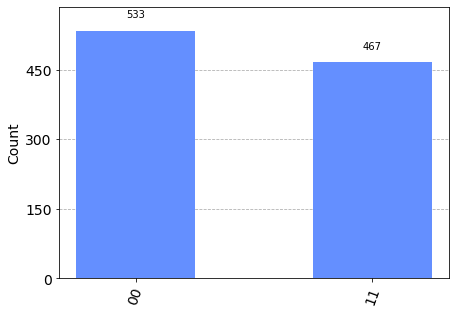

In [ ]:
plot_histogram(counts)


# **Density matrix**
based on 'Experimental realization of quantum teleportation of an
arbitrary two-qubit state using a four-qubit cluster state
Rajiuddin Sk1 · Alakesh Baishya2 · Bikash K. Behera1,3 ·
Prasanta K. Panigrahi1'

In [ ]:
qc_AB = QuantumCircuit(2)
qc_AB.h(0)
qc_AB.cx(0,1)
qc_AB.draw()

┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘

In [ ]:
psi_AB = qi.Statevector.from_instruction(qc_AB)
print(psi_AB.draw('text'))
psi_AB.draw('latex')

[0.70710678+0.j,0.        +0.j,0.        +0.j,0.70710678+0.j]


<IPython.core.display.Latex object>

In [ ]:
rho_AB = qi.DensityMatrix.from_instruction(qc_AB)
rho_AB.draw('latex', prefix='\\rho_{AB} = ')

<IPython.core.display.Latex object>

In [ ]:
type(rho_AB)

qiskit.quantum_info.states.densitymatrix.DensityMatrix

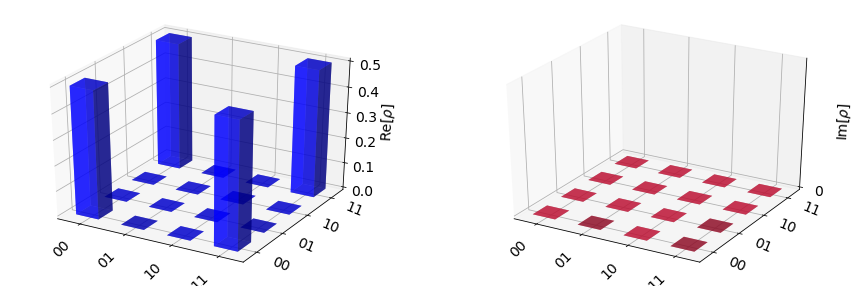

In [ ]:
rho_AB.draw('city',alpha = 0.6,color=['blue', 'crimson'])

# **Experimental density matrix**

based on 'Experimental realization of quantum teleportation of an arbitrary two-qubit state using a four-qubit cluster state Rajiuddin Sk1 · Alakesh Baishya2 · Bikash K. Behera1,3 · Prasanta K. Panigrahi1'

In [ ]:
import numpy as np
import sympy as smp
from sympy.core.trace import Tr
from sympy import Matrix
from sympy.physics.quantum import TensorProduct

In [ ]:
m1 = int(input('enter the number of raw '))
n1 = int(input('enter the number of col '))

I = Matrix([[complex(input()) for i in range (n1)] for k in range (m1)])
print(I)

m2 = int(input('enter the number of raw '))
n2 = int(input('enter the number of col '))

S_X = Matrix([[complex(input()) for i in range (n2)] for k in range (m2)])
print(S_X)

m3 = int(input('enter the number of raw '))
n3 = int(input('enter the number of col '))

S_Y = Matrix([[complex(input()) for i in range (n3)] for k in range (m3)])
print(S_Y)

m4 = int(input('enter the number of raw '))
n4 = int(input('enter the number of col '))

S_Z = Matrix([[complex(input()) for i in range (n4)] for k in range (m4)])
print(S_Z)

enter the number of raw 2
enter the number of col 2
1
0
0
1
Matrix([[1.00000000000000, 0], [0, 1.00000000000000]])
enter the number of raw 2
enter the number of col 2
0
1
1
0
Matrix([[0, 1.00000000000000], [1.00000000000000, 0]])
enter the number of raw 2
enter the number of col 2
0
j
-j
0
Matrix([[0, 1.0*I], [-1.0*I, 0]])
enter the number of raw 2
enter the number of col 2
1
0
0
-1
Matrix([[1.00000000000000, 0], [0, -1.00000000000000]])


In [ ]:
print(I)
print(S_X)
print(S_Y)
print(S_Z)

Matrix([[1.00000000000000, 0], [0, 1.00000000000000]])
Matrix([[0, 1.00000000000000], [1.00000000000000, 0]])
Matrix([[0, 1.0*I], [-1.0*I, 0]])
Matrix([[1.00000000000000, 0], [0, -1.00000000000000]])


In [ ]:
T_II = 1
T_IX = T_IY = T_IZ = 0
T_XI = T_YI = T_ZI = 0.06
T_XX = T_YY = T_ZZ = T_XY = T_YX = T_XZ = T_ZX = T_YZ =T_ZY = 0.26

pE = 1/4*(T_II*(TensorProduct(I,I)) + T_IX*(TensorProduct(I,S_X) ) + T_IY*(TensorProduct(I,S_Y)) + T_IZ*(TensorProduct(I,S_Z))
+ T_XI*(TensorProduct(S_X,I)) + T_XX*(TensorProduct(S_X,S_X)) + T_XY*(TensorProduct(S_X,S_Y)) + T_XZ*(TensorProduct(S_X,S_Z))
+ T_YI*(TensorProduct(S_Y,I)) + T_YX*(TensorProduct(S_Y,S_X)) + T_YY*(TensorProduct(S_Y,S_Y)) + T_YZ*(TensorProduct(S_Y,S_Z))
+ T_ZI*(TensorProduct(S_Z,I)) + T_ZX*(TensorProduct(S_Z,S_X)) + T_ZY*(TensorProduct(S_Z,S_Y)) + T_ZZ*(TensorProduct(S_Z,S_Z)) )

pE

Matrix([
[           0.33, 0.065 - 0.065*I,    0.08 - 0.08*I,          -0.13*I],
[0.065 + 0.065*I,             0.2,             0.13,   -0.05 + 0.05*I],
[  0.08 + 0.08*I,            0.13,             0.17, -0.065 + 0.065*I],
[         0.13*I,  -0.05 - 0.05*I, -0.065 - 0.065*I,              0.3]])

In [ ]:
type(pE)h

sympy.matrices.dense.MutableDenseMatrix

In [ ]:
from os import MFD_HUGE_64KB
m5 = int(input('enter the number of raw '))
n5 = int(input('enter the number of col '))

real = Matrix([[complex(input()) for i in range (n5)] for k in range (m5)])

In [ ]:
m6 = int(input('enter the number of raw '))
n6 = int(input('enter the number of col '))

imaginary = Matrix([[complex(input()) for i in range (n6)] for k in range (m6)])

imaginary

In [ ]:
real

Matrix([
[ 0.33, 0.065,   0.08,      0],
[0.065,   0.2,   0.13,  -0.05],
[ 0.08,  0.13,   0.17, -0.065],
[    0, -0.05, -0.065,    0.3]])

In [ ]:
imaginary

Matrix([
[      0, -0.065*I,  -0.08*I, -0.13*I],
[0.065*I,        0,        0,  0.05*I],
[ 0.08*I,        0,        0, 0.065*I],
[ 0.13*I,  -0.05*I, -0.065*I,       0]])

In [ ]:
a = np.sqrt(rho_AB)
b = a*pE*a
c = smp.sqrt(b)
print("fedility =",np.trace(c))
c

fedility = 0.793725393319377


Matrix([
[0.315, 0, 0, 0.315],
[    0, 0, 0,     0],
[    0, 0, 0,     0],
[0.315, 0, 0, 0.315]])**(1/2)